# Influence of Social Media and Stress on Students Academic Performance

### Team Members:

Rebecca Falash (rfalash)

## Overview:

As a team we decided to study the influence of social media and outward pressures on a students performance at school. We have included two datasets for our analysis which includes a social media user activity dataset that contains information on students social media usage as well as other demographic information such as gender, income level, relationship status, etc. This dataset will help us identify patterns that are connected to the level of social media usage the student has and its connection to other lifestyle factors. The second dataset is the student mental health assessments which contains information on a students mental health in broken down variables including stress, depression, and anxiety levels. For our analysis, we grouped and averaged the data by age and gender to study the patterns between social media usage, lifestyle factors, and mental health outcomes. 

## Motivation:

We chose this topic for our project because we understand the pressures that come with being a student. As a team we wanted to better understand how outside factors can influence our mental health... (add more)

#### Research Questions

1. Do male and female students preform differently under high stress ?
    * Is there a correlation between stress levels, age and GPA?

For this question I hope to learn if there is a significant different in academic perform between males and females in high stress environments. My hypothesis would say that there would be no significant difference in the way different genders handle stress in relation to the the final GPA but that older students may handle stress more efficiently then younger.


2. 
3. 

## Data sources:

1. https://www.kaggle.com/datasets/sadiajavedd/social-media-user-activity-dataset

2. https://www.kaggle.com/datasets/sonia22222/students-mental-health-assessments/data

These two datasets compliment each other because one captures behaviors and demographics such as social media usage, sleep, and study habits. While the other captures mental health outcomes such as stress, anxiety, and depression. When using both together you can study the connection between lifestyle factors, mental health, and academic performance in relation to age and gender.

In [ ]:
import pandas as pd
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns

student_habits_URL = kagglehub.dataset_download(
    "jayaantanaath/student-habits-vs-academic-performance"
)

mental_health_URL = kagglehub.dataset_download(
    "sonia22222/students-mental-health-assessments"
)

filename1 = "student_habits_performance.csv"
filename2 = "students_mental_health_survey.csv"

full_path1 = os.path.join(student_habits_URL, filename1)
full_path2 = os.path.join(mental_health_URL, filename2)

df_habits = pd.read_csv(full_path1)
df_MH = pd.read_csv(full_path2)

/Users/rebeccafalash/Desktop/si618/SI_618_project1/path/to/venv/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data Description

**Variables of interest**

* Gender
* Age
* Mental_health_rating
* stress_level
* Depression_Score
* Anxiety_Score
* sleep_hours

**size of datasets and missing values**

* 'student_habits_performance.csv' (df_habits): 
    - 1000 rows of data
    - 91 missing entries for parental_education_level

* 'students_mental_health_survey.csv' (df_MH):
    - 7022 rows of data
    - 12 missing values for CGPA
    - 15 missing values for Substance_Use

**Other Information**



In [2]:
df_habits.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   str    
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   str    
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   str    
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   str    
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    str    
 12  internet_quality               1000 non-null   str    
 13  

In [3]:
df_habits.isna().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [4]:
df_MH.info()

<class 'pandas.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7022 non-null   int64  
 1   Course                       7022 non-null   str    
 2   Gender                       7022 non-null   str    
 3   CGPA                         7010 non-null   float64
 4   Stress_Level                 7022 non-null   int64  
 5   Depression_Score             7022 non-null   int64  
 6   Anxiety_Score                7022 non-null   int64  
 7   Sleep_Quality                7022 non-null   str    
 8   Physical_Activity            7022 non-null   str    
 9   Diet_Quality                 7022 non-null   str    
 10  Social_Support               7022 non-null   str    
 11  Relationship_Status          7022 non-null   str    
 12  Substance_Use                7007 non-null   str    
 13  Counseling_Service_Use       

In [5]:
df_MH.isna().sum()

Age                             0
Course                          0
Gender                          0
CGPA                           12
Stress_Level                    0
Depression_Score                0
Anxiety_Score                   0
Sleep_Quality                   0
Physical_Activity               0
Diet_Quality                    0
Social_Support                  0
Relationship_Status             0
Substance_Use                  15
Counseling_Service_Use          0
Family_History                  0
Chronic_Illness                 0
Financial_Stress                0
Extracurricular_Involvement     0
Semester_Credit_Load            0
Residence_Type                  0
dtype: int64

## Data Manipulation:

In [ ]:
df_habits = df_habits.rename(columns={"gender": "Gender", "age": "Age"})
new_HB_df = (
    df_habits.groupby(["Gender", "Age"])
    .agg(
        {
            "study_hours_per_day": "mean",
            "sleep_hours": "mean",
            "mental_health_rating": "mean",
        }
    )
    .reset_index()
)

new_SM_df = (
    df_MH.groupby(["Gender", "Age"])
    .agg(
        {
            "CGPA": "mean",
            "Stress_Level": "mean",
            "Depression_Score": "mean",
            "Anxiety_Score": "mean",
            "Financial_Stress": "mean",
        }
    )
    .reset_index()
)

data_merged = pd.merge(new_HB_df, new_SM_df, on=["Gender", "Age"])

data_merged

,Gender,Age,study_hours_per_day,sleep_hours,mental_health_rating,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress
0,Female,18,3.884746,6.500000,5.627119,3.487614,2.486076,2.215190,2.281013,2.346835
1,Female,19,3.490164,6.527869,5.114754,3.511901,2.479339,2.311295,2.212121,2.418733
2,Female,20,3.644595,6.372973,6.175676,3.479396,2.285714,2.318681,2.362637,2.409341
3,Female,21,3.514286,6.357143,5.031746,3.475838,2.479058,2.264398,2.277487,2.486911
4,Female,22,3.633333,6.375000,5.200000,3.500716,2.500000,2.321429,2.205357,2.502976
5,Female,23,3.468627,6.547059,5.039216,3.473462,2.375000,2.355769,2.400641,2.375000
6,Female,24,3.454545,6.518182,5.218182,3.523243,2.440154,2.231660,2.320463,2.598456
7,Male,18,3.340741,6.338889,5.407407,3.493421,2.612245,2.314869,2.329446,2.504373
8,Male,19,3.475510,6.359184,5.938776,3.481470,2.585014,2.121037,2.299712,2.579251
9,Male,20,3.464615,6.301538,5.538462,3.468101,2.428969,2.261838,2.306407,2.373259


## Data Visualization:

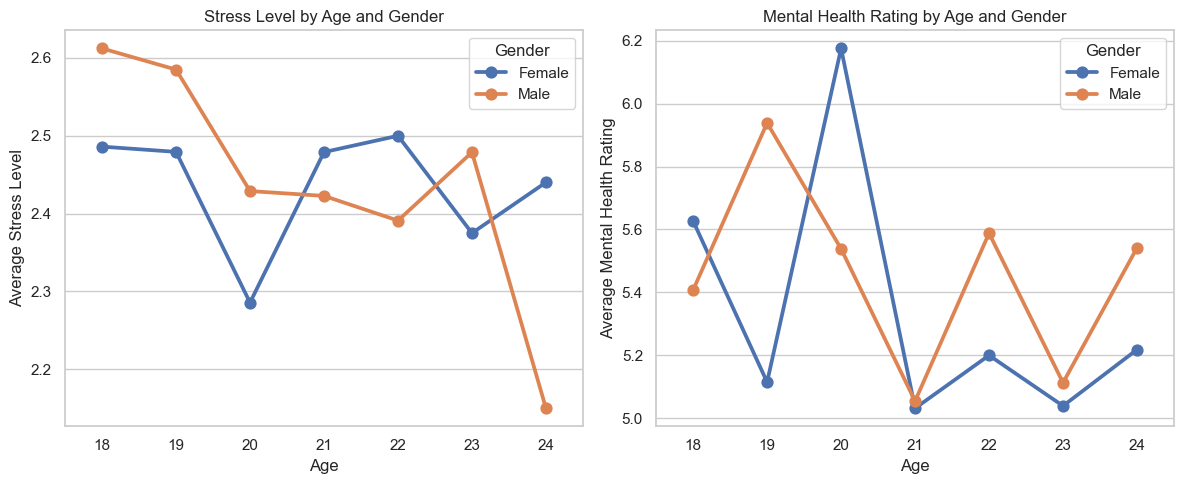

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.pointplot(
    data=data_merged,
    x="Age",
    y="Stress_Level",
    hue="Gender",
    ax=axes[0],
)
axes[0].set_title("Stress Level by Age and Gender")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Average Stress Level")

sns.pointplot(
    data=data_merged,
    x="Age",
    y="mental_health_rating",
    hue="Gender",
    ax=axes[1],
)
axes[1].set_title("Mental Health Rating by Age and Gender")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Average Mental Health Rating")
axes[0].legend(title="Gender")

plt.tight_layout()
plt.show()

The plots above show the change in both the average mental health ratings and the average stress levels by age and gender.

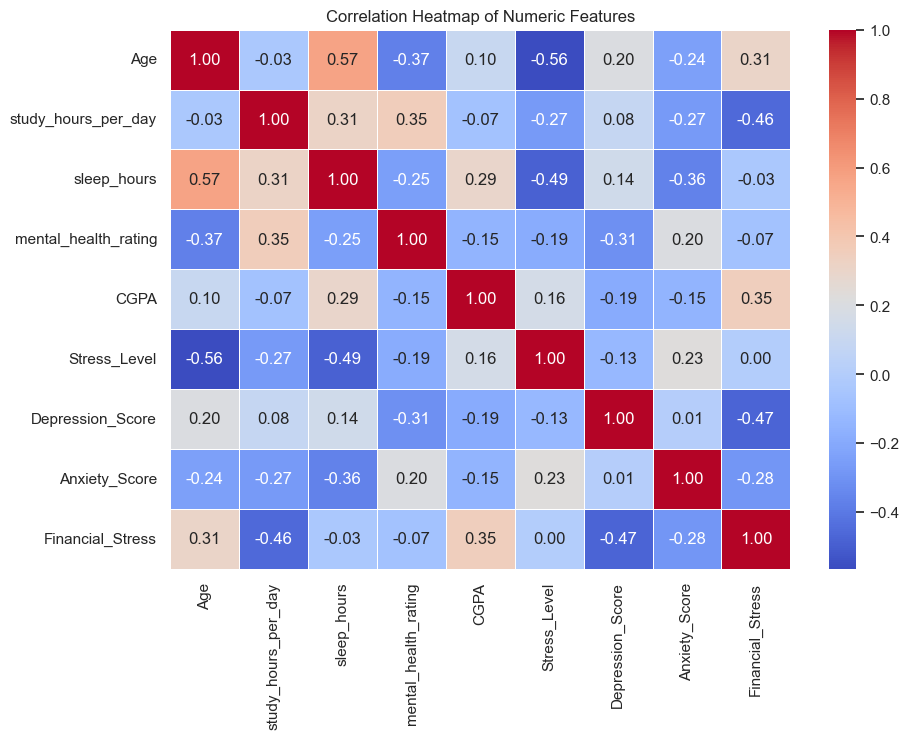

In [5]:
numeric_cols = data_merged.select_dtypes(include="number")
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()